In [1]:
import numpy as np
import pandas as pd
import os
from utils.config import path_dir_descriptor, path_dir_data, path_dir_tsOutput, Poly_degree, path_file_mapping
from datapre.preprocessTools import loadTrainingDataFeatures
from sklearn import preprocessing
# Load feature matrix

iD, X = loadTrainingDataFeatures(isNormalized=True)

In [2]:

print(iD)
print(iD.size)

[['Sub-A_CA-A_Hyd-A_LigS-A']
 ['Sub-A_CA-A_Hyd-A_LigS-B']
 ['Sub-A_CA-A_Hyd-A_LigS-C']
 ...
 ['Sub-AC_Base-E_Oxo-F_LigA-D']
 ['Sub-AC_Base-E_Oxo-F_LigA-E']
 ['Sub-AC_Base-E_Oxo-F_LigA-F']]
41760


In [3]:
print(X)
print(X.shape)

[[-7.24498693e-01 -7.55462047e-01 -2.62020539e-01 ...  8.95951640e-01
  -3.28329459e-01  3.46483461e-01]
 [-7.24498693e-01 -7.55462047e-01 -2.62020539e-01 ...  1.65038990e+00
  -2.18564586e+00 -1.81874912e+00]
 [-7.24498693e-01 -7.55462047e-01 -2.62020539e-01 ...  5.49305691e-01
  -1.22838386e-03  6.76394299e-01]
 ...
 [-1.05197923e+00  1.52116379e+00 -1.11419949e+00 ... -1.87182068e+00
   3.63075174e-01  5.76187736e-01]
 [-1.05197923e+00  1.52116379e+00 -1.11419949e+00 ... -1.08770845e+00
   6.50166031e-01  4.23565433e-01]
 [-1.05197923e+00  1.52116379e+00 -1.11419949e+00 ...  7.11163721e-01
   1.28541597e+00  1.19477056e-02]]
(41760, 32)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf.shape)


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.scatter(principalDf.loc[:, 'principal component 1']
               , principalDf.loc[:, 'principal component 2']
               , c = 'b'
               , s = 50)
ax.grid()

In [8]:

X1 = X[1:10000,:]
print(X1)

(41760, 2)


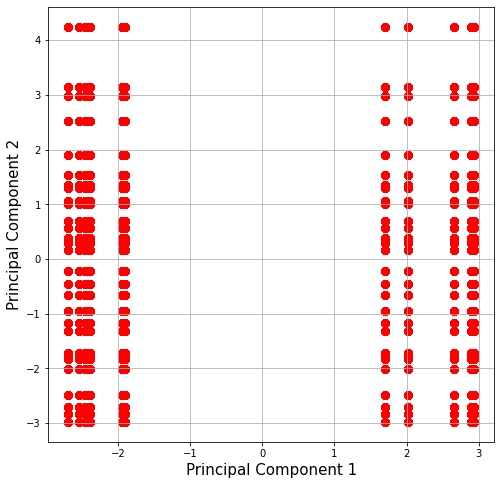

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.scatter(principalDf.loc[:, 'principal component 1']
               , principalDf.loc[:, 'principal component 2']
               , c = 'b'
               , s = 50)
ax.grid()

In [4]:

X1 = X[1:10000,:]
print(X1)

[[-7.24498693e-01 -7.55462047e-01 -2.62020539e-01 ...  1.65038990e+00
  -2.18564586e+00 -1.81874912e+00]
 [-7.24498693e-01 -7.55462047e-01 -2.62020539e-01 ...  5.49305691e-01
  -1.22838386e-03  6.76394299e-01]
 [-7.24498693e-01 -7.55462047e-01 -2.62020539e-01 ... -2.59085250e-01
  -1.67586656e-01  1.12655301e+00]
 ...
 [ 1.20056387e-01  1.48816921e+00 -2.62020539e-01 ...  1.65038990e+00
  -2.18564586e+00 -1.81874912e+00]
 [ 1.20056387e-01  1.48816921e+00 -2.62020539e-01 ...  5.49305691e-01
  -1.22838386e-03  6.76394299e-01]
 [ 1.20056387e-01  1.48816921e+00 -2.62020539e-01 ... -2.59085250e-01
  -1.67586656e-01  1.12655301e+00]]


In [5]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X1)

In [6]:
kmedoids.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
kmedoids.cluster_centers_

array([[-0.44872561, -0.75546205,  1.02639287,  1.3586767 ,  0.50301765,
        -0.72367738, -0.21962401,  0.07138266, -0.83503356, -0.0034729 ,
        -1.16887229, -0.40482677, -0.61076569, -0.18414314, -1.14333335,
        -1.17802268, -0.31426136, -0.37194424, -0.01206618, -0.69008205,
        -0.9988205 , -1.03718608,  1.03855895,  1.03664131,  1.07006267,
         0.        ,  0.        ,  0.        , -1.05861274, -0.79411596,
         0.17916856, -0.20542345],
       [-0.44872561, -0.75546205,  1.02639287,  1.3586767 ,  0.50301765,
        -0.72367738, -0.21962401,  0.07138266, -0.83503356, -0.0034729 ,
        -1.16887229, -0.40482677,  1.17005815, -0.267837  ,  0.77417228,
         1.04426558, -0.31426136, -0.37194424, -0.01206618, -0.69008205,
        -0.9988205 , -1.03718608,  1.03855895,  1.03664131,  1.07006267,
         0.        ,  0.        ,  0.        , -1.05861274, -0.79411596,
         0.17916856, -0.20542345]])